<a href="https://colab.research.google.com/github/braxtonowens/OneraDataset/blob/master/Multispec_FC_EF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/braxtonowens/OneraDataset.git

Cloning into 'OneraDataset'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1950 (delta 1), reused 3 (delta 1), pack-reused 1945
Receiving objects: 100% (1950/1950), 908.17 MiB | 35.54 MiB/s, done.
Resolving deltas: 100% (202/202), done.
Checking out files: 100% (1631/1631), done.


Here we take the original images and create lots of random smaller images returning arrays of the images and masks.

In [2]:
from osgeo import gdal
import numpy as np
import os
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt


# Choose from bands (B01, B02, B02, B04, B05, B06, B07, B08, B09, B10, B11, B12, B8A)
channels = ['B02','B03','B04','B08']
# path to Onera Dataset
mainDir = 'OneraDataset/OneraData'
images = '/images'
labels = '/labels'
IMAGE_SIZE = 96


def create_stacked_chips(channels, mainDir, images, labels, IMAGE_SIZE):
  #countImage = []
  mainPath = mainDir
  imgPath = mainDir + images
  lblPath = mainDir + labels
  img_list = np.zeros((908,96,96,8))
  lbl_list = np.zeros((908,96,96,1))
  city_ls = os.listdir(lblPath)
  city_ls.remove('README.txt')
  if not('mini_images' in os.listdir(mainPath)):
    os.mkdir(mainPath +'/mini_images')
    os.mkdir(mainPath +'/mini_labels')
  k = 0
  count = 0
  for city in city_ls:
    beforeList = []
    afterList = []
    lblList = []
    for channel in channels:
      img_file1 = imgPath + '/'+ city + '/imgs_1_rect/' + channel + '.tif'
      ds = gdal.Open(img_file1, gdal.GA_ReadOnly)
      rb = ds.GetRasterBand(1)
      beforeList.append(rb.ReadAsArray())
      img_file2 = imgPath + '/' + city + '/imgs_2_rect/' + channel + '.tif'
      ds = gdal.Open(img_file2, gdal.GA_ReadOnly)
      rb = ds.GetRasterBand(1)
      afterList.append(rb.ReadAsArray())
      lbl_file = lblPath + '/' + city + '/cm/' + city + '-cm' '.tif'
      ds = gdal.Open(lbl_file, gdal.GA_ReadOnly)
      rb = ds.GetRasterBand(1)
      lblList.append(rb.ReadAsArray())
    y = 0
    
    for i in range(beforeList[0].shape[1]//IMAGE_SIZE):
        x = 0
        for j in range(beforeList[0].shape[0]//IMAGE_SIZE):
            before_mini_img1 = beforeList[0][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE]
            before_mini_img2 = beforeList[1][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE]
            before_mini_img3 = beforeList[2][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE]
            before_mini_img4 = beforeList[3][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE]

            after_mini_img1 = afterList[0][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE]
            after_mini_img2 = afterList[1][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE]
            after_mini_img3 = afterList[2][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE]
            after_mini_img4 = afterList[3][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE]


            lbl_mini_img1 = lblList[0][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE] - 1

            count +=1 
            img_list[k] = tf.stack([before_mini_img1,before_mini_img2,before_mini_img3,before_mini_img4,after_mini_img1,after_mini_img2,after_mini_img3,after_mini_img4],axis=2)

            mini_lbl = np.expand_dims(lbl_mini_img1,2)
            lbl_list[k] = (mini_lbl)
            x += IMAGE_SIZE
            k +=1
        y += IMAGE_SIZE
  print(count)
  cityL = ['Beirut','Brasilia','Cupertino','Dubai','Milano','Montepellier','Mumbai','Nantes','Paris','Pisa']
  cityCount = 0
  k = 0
  img_list1 = np.zeros((132,96,96,8))
  count1 = 0
  for root, dirs, files in os.walk('/content/OneraDataset/10Cities'):
    for dir in dirs:
      if dir.startswith(cityL[cityCount]):
        if dir.endswith("Clear"):
          before_list = []
          after_list = []
          for channel in channels:
            ds = gdal.Open(root +'/'+ dir + '/' + channel + '.tif', gdal.GA_ReadOnly)
            rb = ds.GetRasterBand(1)
            before_list.append(rb.ReadAsArray())
            ds = gdal.Open(root + '/' + dir[:-3] + 'oud' + '/' + channel + '.tif', gdal.GA_ReadOnly)
            rb = ds.GetRasterBand(1)
            after_list.append(rb.ReadAsArray())
          y = 0
          
          for i in range(before_list[0].shape[1]//IMAGE_SIZE):
            x = 0
            for j in range(before_list[0].shape[0]//IMAGE_SIZE):
                before_mini_img1 = before_list[0][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE]
                before_mini_img2 = before_list[1][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE]
                before_mini_img3 = before_list[2][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE]
                before_mini_img4 = before_list[3][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE]


                after_mini_img1 = after_list[0][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE]
                after_mini_img2 = after_list[1][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE]
                after_mini_img3 = after_list[2][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE]
                after_mini_img4 = after_list[3][x:x+IMAGE_SIZE,y:y+IMAGE_SIZE]

                count1 +=1
                img_list1[k] = (tf.stack([before_mini_img1,before_mini_img2,before_mini_img3,before_mini_img4,after_mini_img1,after_mini_img2,after_mini_img3,after_mini_img4],axis=2))
                
                x += IMAGE_SIZE
                k +=1
            y += IMAGE_SIZE
  
    cityCount += 1
  img_list1 = np.array(img_list1)
          
  img_list = np.concatenate((img_list,img_list1), axis = 0)


  tempLabel = np.zeros((132,96,96,1))
  
  lbl_list = np.concatenate((lbl_list,tempLabel), axis = 0)
  print(img_list.shape)
  print(lbl_list.shape)
  print(count1)
  return img_list/4095, lbl_list 

Uses sklearn library to split our data into training and testing batches.

In [3]:
from sklearn.model_selection import train_test_split
X,y = create_stacked_chips(channels, mainDir, images, labels, IMAGE_SIZE)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 48)


del X, y

908
(1040, 96, 96, 8)
(1040, 96, 96, 1)
132


Rotates all of the images 3 times to triple the data and then shuffles it all 

In [4]:
from random import randint
def randomRotation(X_train, y_train):
  aug_X_train = np.zeros((len(X_train) * 4,96,96,8))
  aug_y_train = np.zeros((len(y_train) * 4,96,96,1))
  j = 0
  # Augment data
  for i in range(len(X_train)):
    aug_X_train[j] = X_train[i]
    aug_y_train[j] = y_train[i]
    j+=1
    a = np.rot90(X_train[i],1)
    b = np.rot90(y_train[i],1)
    aug_X_train[j] = a
    aug_y_train[j] = b
    j+=1
    a = np.rot90(X_train[i],2)
    b = np.rot90(y_train[i],2)
    aug_X_train[j] = a
    aug_y_train[j] = b
    j+=1
    a = np.rot90(X_train[i],3)
    b = np.rot90(y_train[i],3)
    aug_X_train[j] = a
    aug_y_train[j] = b
    j+=1

  # Shuffle data
  seed = np.random.randint(0, 100000)  
  np.random.seed(seed)  
  np.random.shuffle(aug_X_train)  
  np.random.seed(seed)  
  np.random.shuffle(aug_y_train)     
  return aug_X_train,aug_y_train
    

X_train,y_train = randomRotation(X_train,y_train)

Here is our model almost entirely inspired by https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/ and https://github.com/zhixuhao/unet

In [5]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K



def unet(pretrained_weights = None,input_size = (112,112,8)):
    inputs = Input(input_size)
    conv1 = Conv2D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv4 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    #conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    #conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    #drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool4))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
 
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
  
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(16, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
   
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)

    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10) 

    model.compile(optimizer = Adam(lr=1e-4), loss = 'binary_crossentropy' , metrics = ['accuracy']) # was 'binary_crossentropy'
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

Epoch 1/10
1114/1114 [==============================] - 10s 9ms/step - loss: 0.1444 - accuracy: 0.9719 - val_loss: 0.1328 - val_accuracy: 0.9691
Epoch 2/10
1114/1114 [==============================] - 10s 9ms/step - loss: 0.1213 - accuracy: 0.9726 - val_loss: 0.1316 - val_accuracy: 0.9691
Epoch 3/10
1114/1114 [==============================] - 10s 9ms/step - loss: 0.1124 - accuracy: 0.9726 - val_loss: 0.1160 - val_accuracy: 0.9691
Epoch 4/10
1114/1114 [==============================] - 9s 8ms/step - loss: 0.1021 - accuracy: 0.9728 - val_loss: 0.1025 - val_accuracy: 0.9696
Epoch 5/10
1114/1114 [==============================] - 9s 8ms/step - loss: 0.0928 - accuracy: 0.9738 - val_loss: 0.0934 - val_accuracy: 0.9711
Epoch 6/10
1114/1114 [==============================] - 9s 8ms/step - loss: 0.0844 - accuracy: 0.9744 - val_loss: 0.0983 - val_accuracy: 0.9704
Epoch 7/10
1114/1114 [==============================] - 10s 9ms/step - loss: 0.0817 - accuracy: 0.9750 - val_loss: 0.0835 - val_accur

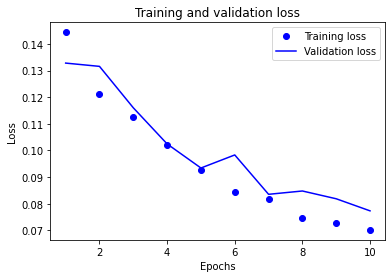

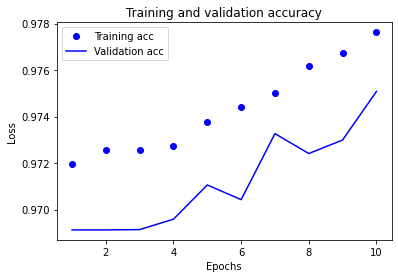

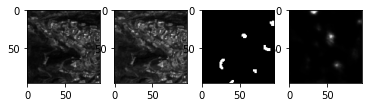

Dice similarity score is 0.08338836299322573


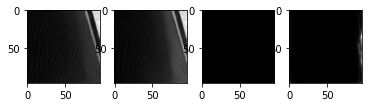

Dice similarity score is 0.0


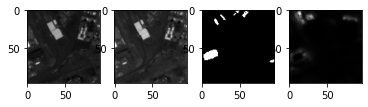

Dice similarity score is 0.09130076310113662


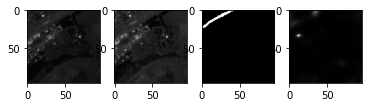

Dice similarity score is 0.06292969983685093


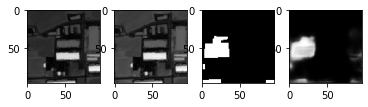

Dice similarity score is 0.7040867874324105


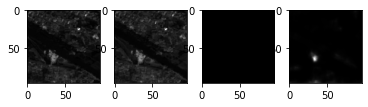

Dice similarity score is 0.0


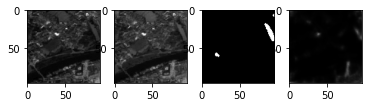

Dice similarity score is 0.016784487776442075


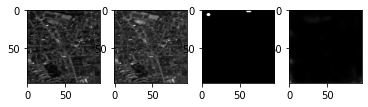

Dice similarity score is 0.0009260066803661927


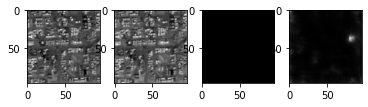

Dice similarity score is 0.0


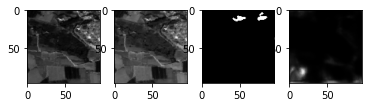

Dice similarity score is 0.00279834482669352


In [6]:
model = unet()
model.save_weights('model4.h5')
history = model.fit(X_train, y_train, batch_size=2, epochs=10, verbose=1,validation_split=0.2, shuffle=True)
results = model.predict(X_test)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)

print(model.summary)


plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


from scipy.spatial import distance

sumdice = 0
for i in range(10):

  img = results[i]
  img1 = y_test[i]
  img2 = X_test[i]
  fig, (ax1, ax2, ax3, ax4) =  plt.subplots(1,4)
  ax1.imshow(img2[:,:,0], cmap = 'gray')
  ax2.imshow(img2[:,:,1], cmap = 'gray')
  ax4.imshow(img[:,:,0], cmap = 'gray')
  ax3.imshow(img1[:,:,0], cmap = 'gray')
  plt.show()
  dice = np.sum(img[:,:,0][img1[:,:,0]==1])*2.0 / (np.sum(img[:,:,0]) + np.sum(img1[:,:,0]))
  print("Dice similarity score is {}".format(dice))

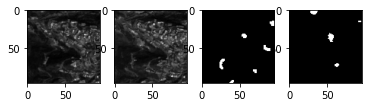

Dice similarity score is 0.21971830985915494


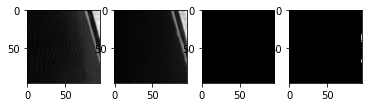

Dice similarity score is 0.0


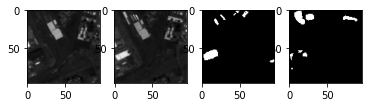

Dice similarity score is 0.24571428571428572


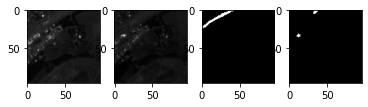

Dice similarity score is 0.20430107526881722


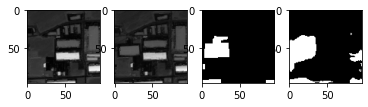

Dice similarity score is 0.7172306495527032


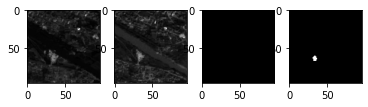

Dice similarity score is 0.0


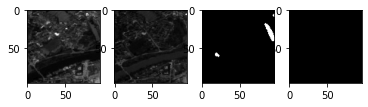

Dice similarity score is 0.0


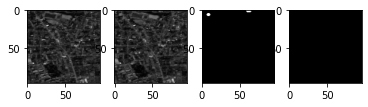

Dice similarity score is 0.0


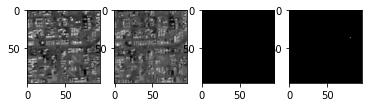

Dice similarity score is 0.0


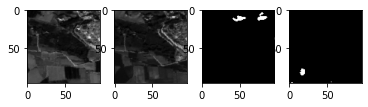

Dice similarity score is 0.0


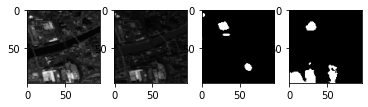

Dice similarity score is 0.2543689320388349


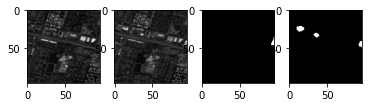

Dice similarity score is 0.3105590062111801


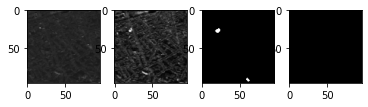

Dice similarity score is 0.0


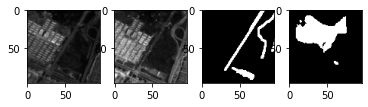

Dice similarity score is 0.1789279112754159


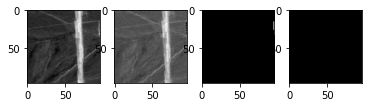

Dice similarity score is 0.0


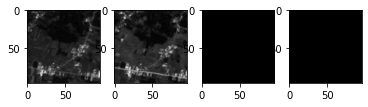

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


Dice similarity score is nan


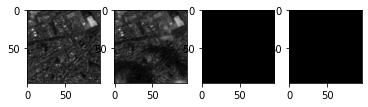

Dice similarity score is nan


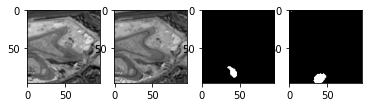

Dice similarity score is 0.2556390977443609


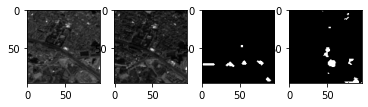

Dice similarity score is 0.24608501118568232


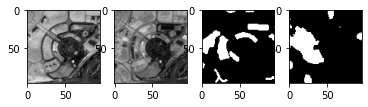

Dice similarity score is 0.5490324696621843


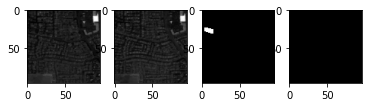

Dice similarity score is 0.0


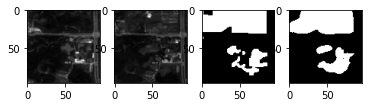

Dice similarity score is 0.885823754789272


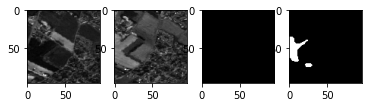

Dice similarity score is 0.0


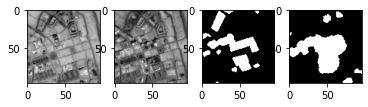

Dice similarity score is 0.6118453255017132


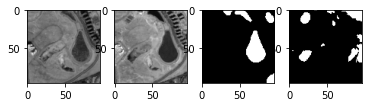

Dice similarity score is 0.15036144578313254


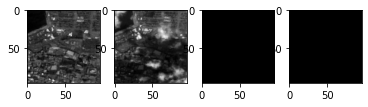

Dice similarity score is nan


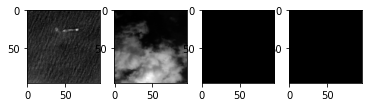

Dice similarity score is nan


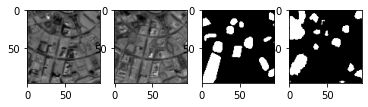

Dice similarity score is 0.48534850640113797


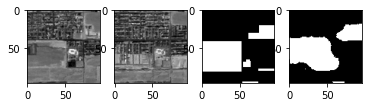

Dice similarity score is 0.8188202247191011


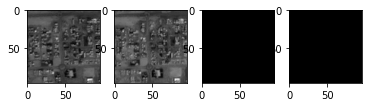

Dice similarity score is nan


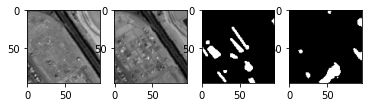

Dice similarity score is 0.23249097472924188


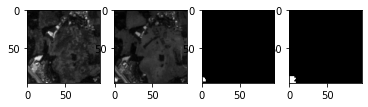

Dice similarity score is 0.5454545454545454


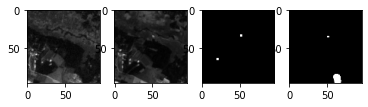

Dice similarity score is 0.046153846153846156


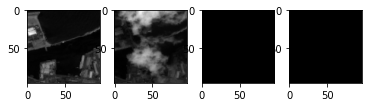

Dice similarity score is nan


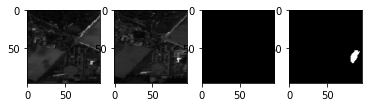

Dice similarity score is 0.0


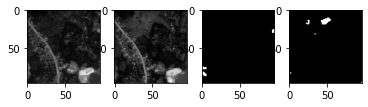

Dice similarity score is 0.03636363636363636


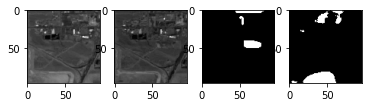

Dice similarity score is 0.10641891891891891


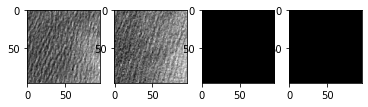

Dice similarity score is nan


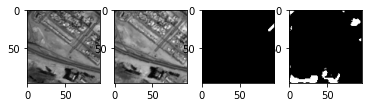

Dice similarity score is 0.0


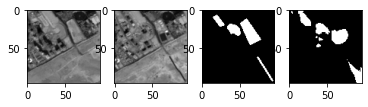

Dice similarity score is 0.6402116402116402


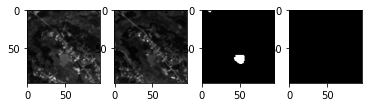

Dice similarity score is 0.0


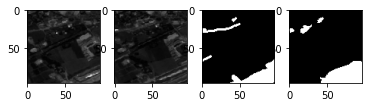

Dice similarity score is 0.7316861725184222


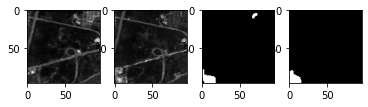

Dice similarity score is 0.775609756097561


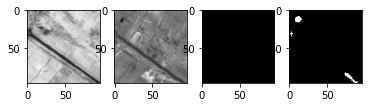

Dice similarity score is 0.0


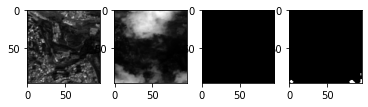

Dice similarity score is 0.0


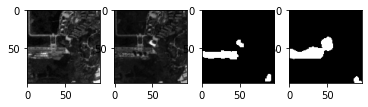

Dice similarity score is 0.7084507042253522


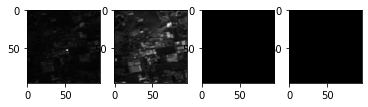

Dice similarity score is nan


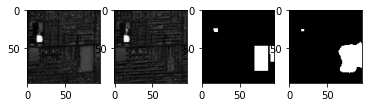

Dice similarity score is 0.8443935926773455


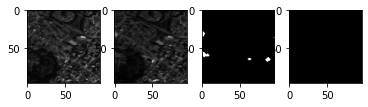

Dice similarity score is 0.0


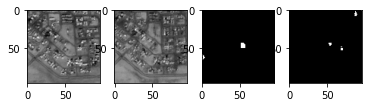

Dice similarity score is 0.24489795918367346


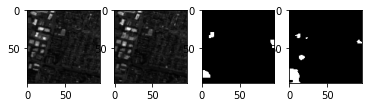

Dice similarity score is 0.5296442687747036


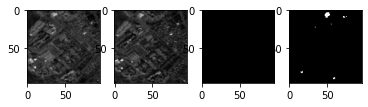

Dice similarity score is 0.0


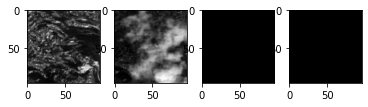

Dice similarity score is nan


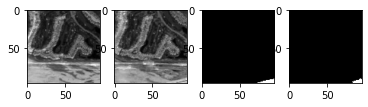

Dice similarity score is 0.7596899224806202


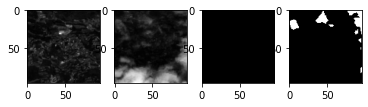

Dice similarity score is 0.0


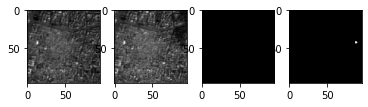

Dice similarity score is 0.0


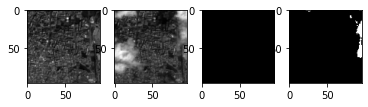

Dice similarity score is 0.0


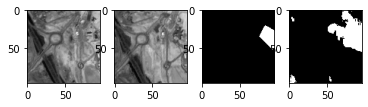

Dice similarity score is 0.4605925097820011


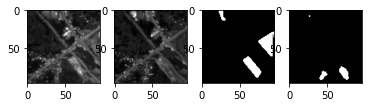

Dice similarity score is 0.24091381100726894


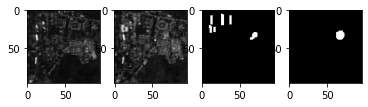

Dice similarity score is 0.33613445378151263


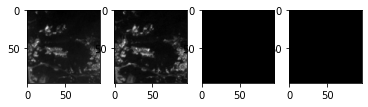

Dice similarity score is nan


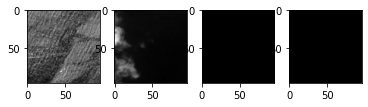

Dice similarity score is nan


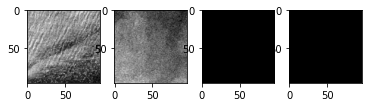

Dice similarity score is nan


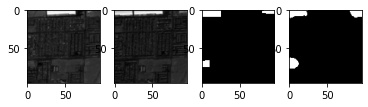

Dice similarity score is 0.8095781071835804


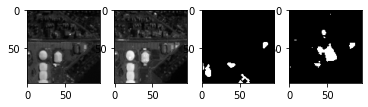

Dice similarity score is 0.1986206896551724


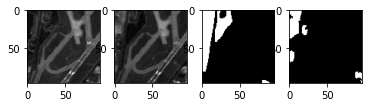

Dice similarity score is 0.5648232094288305


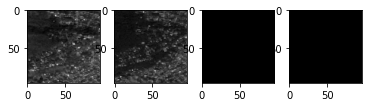

Dice similarity score is nan


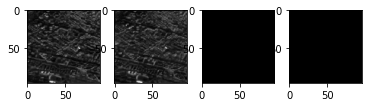

Dice similarity score is nan


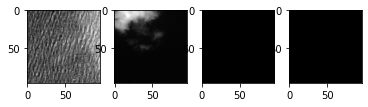

Dice similarity score is nan


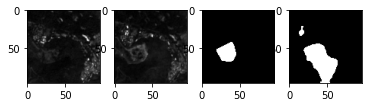

Dice similarity score is 0.5041006014215418


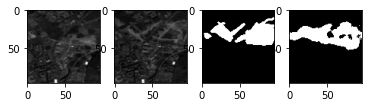

Dice similarity score is 0.7703120607253303


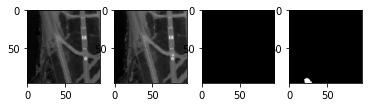

Dice similarity score is 0.0


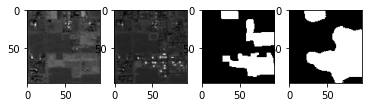

Dice similarity score is 0.7556808757671256


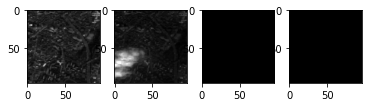

Dice similarity score is nan


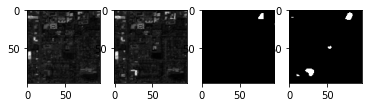

Dice similarity score is 0.39631336405529954


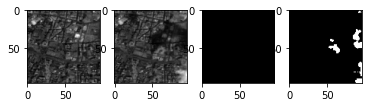

Dice similarity score is 0.0


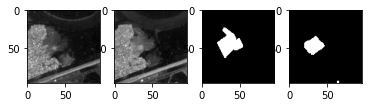

Dice similarity score is 0.7046070460704607


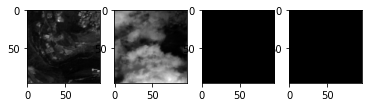

Dice similarity score is nan


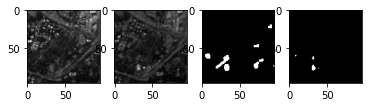

Dice similarity score is 0.22841225626740946


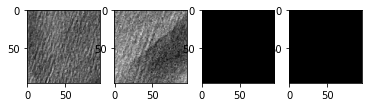

Dice similarity score is nan


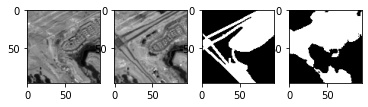

Dice similarity score is 0.739484080873809


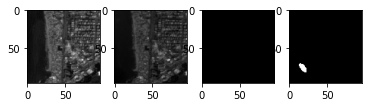

Dice similarity score is 0.0


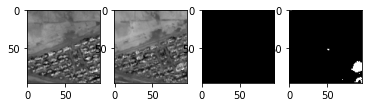

Dice similarity score is 0.0


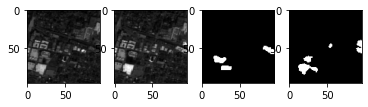

Dice similarity score is 0.4


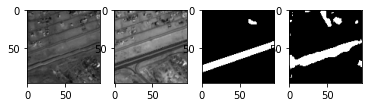

Dice similarity score is 0.5695595290013084


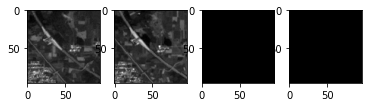

Dice similarity score is nan


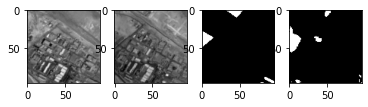

Dice similarity score is 0.5037593984962406


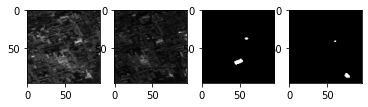

Dice similarity score is 0.0


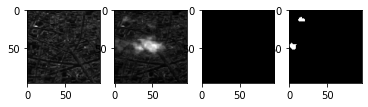

Dice similarity score is 0.0


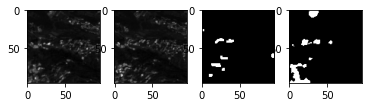

Dice similarity score is 0.3042944785276074


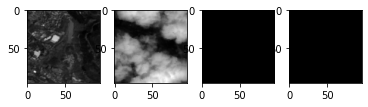

Dice similarity score is nan


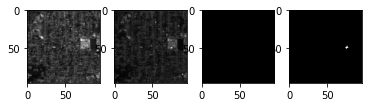

Dice similarity score is 0.0


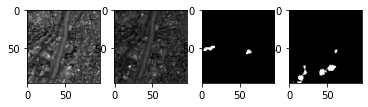

Dice similarity score is 0.08333333333333333


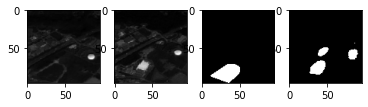

Dice similarity score is 0.40070921985815605


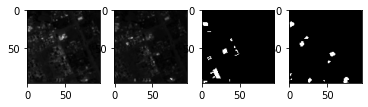

Dice similarity score is 0.14849187935034802


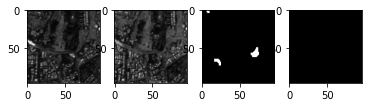

Dice similarity score is 0.0


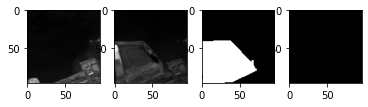

Dice similarity score is 0.0


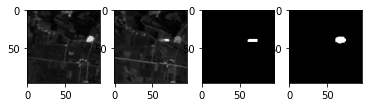

Dice similarity score is 0.631578947368421


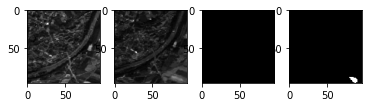

Dice similarity score is 0.0


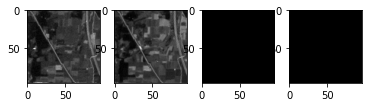

Dice similarity score is nan
Dice similarity score is 0.5496611411301401


In [7]:
tempArray = np.copy(results)
for element in np.nditer(tempArray, op_flags=['readwrite']):
  if element > .1:
    element[...] = 1
  else:
    element[...] = 0
y = []
numer = 0
denom = 0
for i in range(100):
  img = tempArray[i]
  img1 = y_test[i]
  img2 = X_test[i]
  fig, (ax1, ax2, ax3, ax4) =  plt.subplots(1,4)
  ax1.imshow(img2[:,:,0], cmap = 'gray')
  ax2.imshow(img2[:,:,4], cmap = 'gray')
  ax4.imshow(img[:,:,0], cmap = 'gray')
  ax3.imshow(img1[:,:,0], cmap = 'gray')
  plt.show()
  dice = np.sum(img[:,:,0][img1[:,:,0]==1])*2.0 / (np.sum(img[:,:,0]) + np.sum(img1[:,:,0]))
  numer += np.sum(img[:,:,0][img1[:,:,0]==1])
  denom += (np.sum(img[:,:,0]) + np.sum(img1[:,:,0]))
  dice1 = np.sum(img[:,:,0][img1[:,:,0]==1])*2.0 / (np.sum(img[:,:,0]) + np.sum(img1[:,:,0]))
  print("Dice similarity score is {}".format(dice1))
  dice = numer * 2/ denom

print("Dice similarity score is {}".format(dice))